Accuracy: 0.6666666666666666


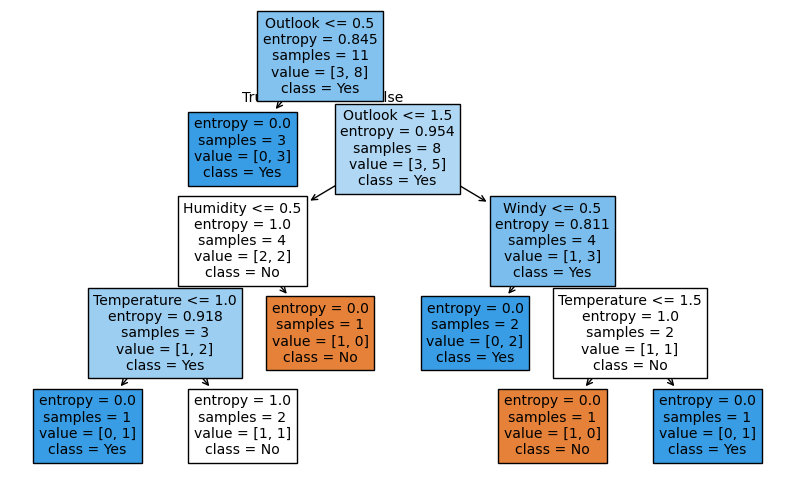

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Create Dataset
data = pd.DataFrame({
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'High'],
    'Windy': ['False', 'True', 'False', 'False', 'False', 'False', 'True', 'False', 'False', 'False', 'True', 'True', 'True', 'False'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No']
})

# Encode Categorical Data
label_encoders = {}
for column in data.columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split Data
X = data.drop('PlayTennis', axis=1)
y = data['PlayTennis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Model
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualize Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

